# 代理
网页服务器会检测某个IP在单位时间内的请求次数，如果超出了某个阈值，那么服务器会拒绝服务，俗称为“封IP”。这时候就需要代理了。搜索免费代理即可找到一些代理IP，也可以在本机安装HTTP或SOCKS代理软件。

代理分为透明代理（http服务器能获取浏览器原始IP）、匿名代理（http服务器直到浏览器使用了代理，但无法获取浏览器原始IP）和高匿名代理（http服务器不知道浏览器使用了代理）。

## 用request来设置代理
1.HTTP代理

In [10]:
import requests
from bs4 import BeautifulSoup

proxy='101.200.238.204:3128'
proxies = {
  'http': 'http://'+proxy,
  'https': 'https://'+proxy,
}

try:
    response=requests.get('http://httpbin.org/get',proxies=proxies)
    print(response.text)
except requests.exceptions.ConnectionError as e:
    print(e.args)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-61c1feab-4e5ec3a03c4a2c1809f2b745"
  }, 
  "origin": "101.200.238.204", 
  "url": "http://httpbin.org/get"
}



可以看到，origin是代理的ip。如果报错‘由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败’，检查下proxy要带端口。如果不是高匿的代理，httpbin还会报本机IP。

2.除了HTTP代理，还可以用SOCK代理。代码和上面的没什么区别。

In [15]:
import requests
from bs4 import BeautifulSoup

proxy='132.145.138.31:1080'
proxies = {
  'http': 'SOCKS5://'+proxy,
  'https': 'SOCKS5://'+proxy,
}

try:
    response=requests.get('http://httpbin.org/get',proxies=proxies)
    print(response.text)
except requests.exceptions.ConnectionError as e:
    print(e.args)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-61c202ee-73ecdcc6483e0c3a70ca77c1"
  }, 
  "origin": "132.145.138.31", 
  "url": "http://httpbin.org/get"
}



## 用Selenium来设置代理

In [16]:
from selenium import webdriver
proxy='101.200.238.204:3128'
chrome_options=webdriver.ChromeOptions()
chrome_options.add_argument('--proxy-server=http://'+ proxy)
browser=webdriver.Chrome(chrome_options=chrome_options)
browser.get('http://httpbin.org/get')

C:\Users\罗皓\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


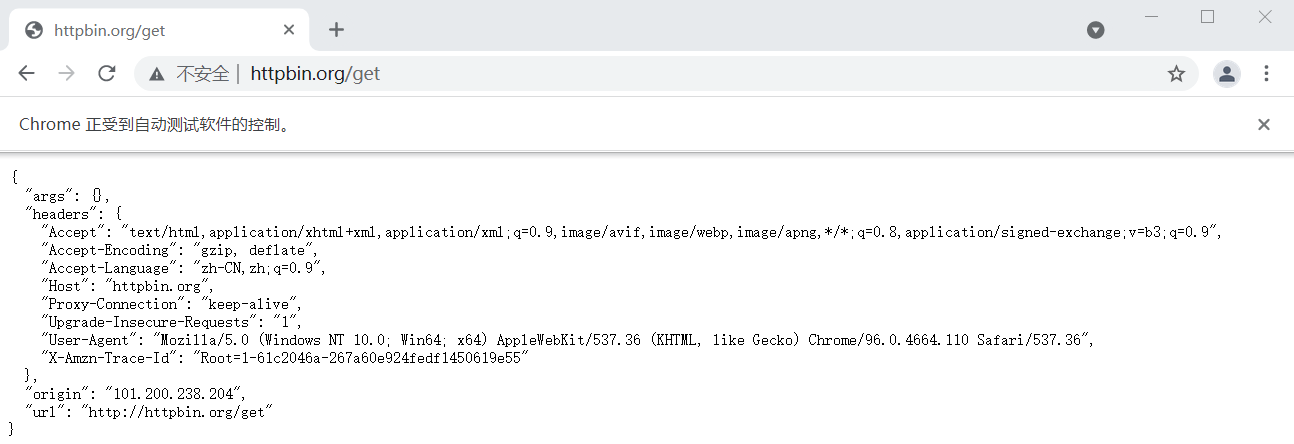

## 代理池
代理（尤其是免费代理）并不保证都可用，而且经常会换，所以我们要维护一个代理池，这里示范一个手动维护的，之后有时间会写一个自动爬取、维护代理池的脚本。如果不想自己写的话，可以在付费代理网站上找。

In [31]:
import requests
import random

proxy='195.68.187.222:3128'
pro=['195.191.246.198:53281','41.229.253.214:8080','41.60.216.148:8080']
proxies = {
  'http': 'http://'+random.choice(pro),
  'https': 'https://'+random.choice(pro),
}

try:
    response=requests.get('http://httpbin.org/get',proxies=proxies)
    print(response.text)
except requests.exceptions.ConnectionError as e:
    print(e.args)

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-61c27c77-146603140eb177847436a005", 
    "X-Proxy-Id": "1181870082"
  }, 
  "origin": "115.27.193.195, 41.60.216.148", 
  "url": "http://httpbin.org/get"
}

